In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import torch

In [ ]:
# YOLOv5 레포지토리 클론
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16656, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 16656 (delta 1), reused 5 (delta 0), pack-reused 16649
Receiving objects: 100% (16656/16656), 15.07 MiB | 22.67 MiB/s, done.
Resolving deltas: 100% (11443/11443), done.


In [ ]:
# 필요한 라이브러리 설치
!pip install -U -r yolov5/requirements.txt

In [ ]:
# 실제 학습 코드
!python yolov5/train.py --img 640 --batch 32 --epochs 70 --data drive/MyDrive/Capstone/dataset/dataset.yaml --weights yolov5s.pt

2024-05-29 06:45:00.122465: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 06:45:00.122524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 06:45:00.231133: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=drive/MyDrive/Capstone/dataset/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=70, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, dev

In [ ]:
# 학습 완료 후 모델 로드
model = torch.hub.load('yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', source='local')

YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)



Exception: [Errno 2] No such file or directory: '/content/yolov5/runs/train/exp/weights/best.pt'. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [ ]:
# 이미지 파일이 있는 폴더 경로
folder_path = '/content/drive/MyDrive/Capstone/example/'

# 이미지 파일 리스트 가져오기
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]

# 이미지 파일 수만큼 루프 돌기
for image_file in image_files:
    # 이미지 파일 경로
    image_path = os.path.join(folder_path, image_file)

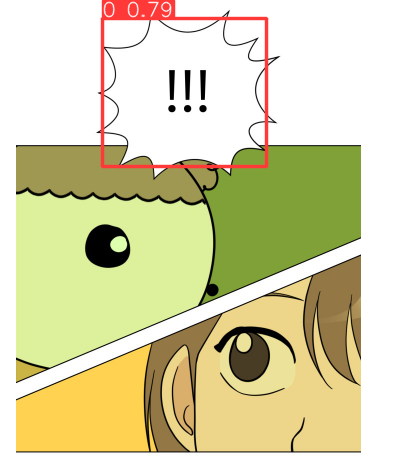

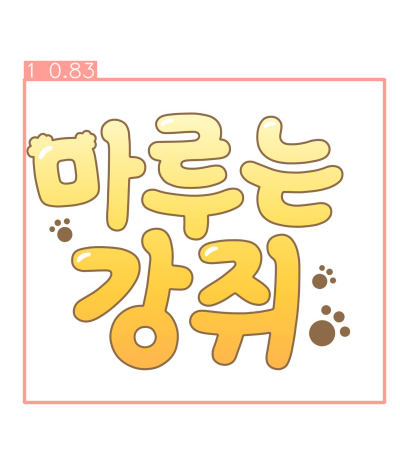

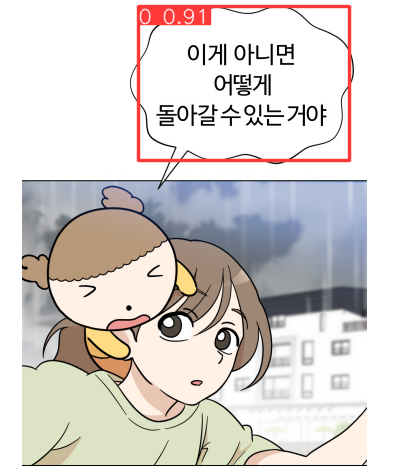

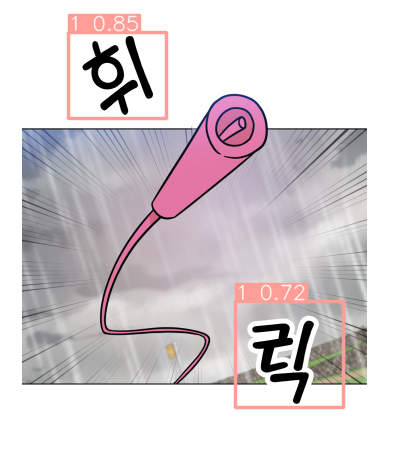

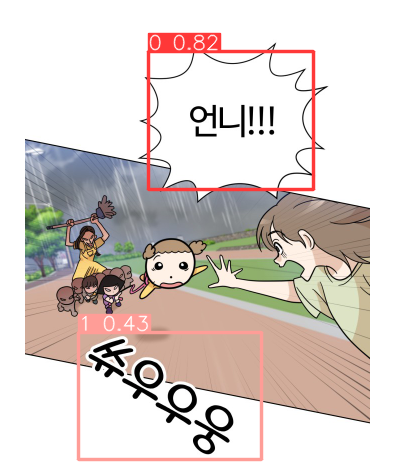

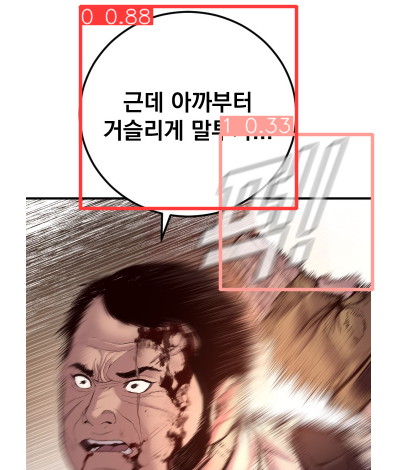

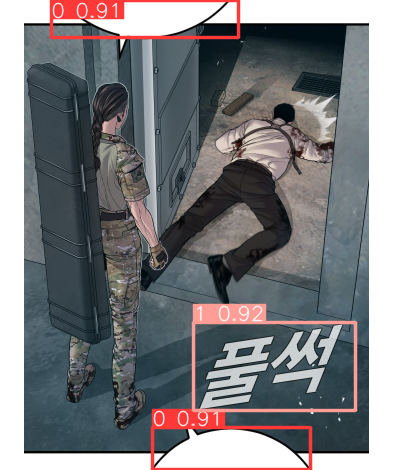

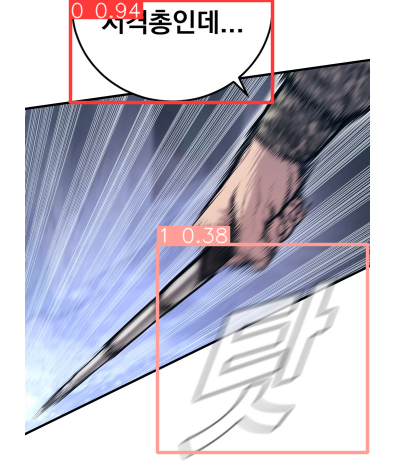

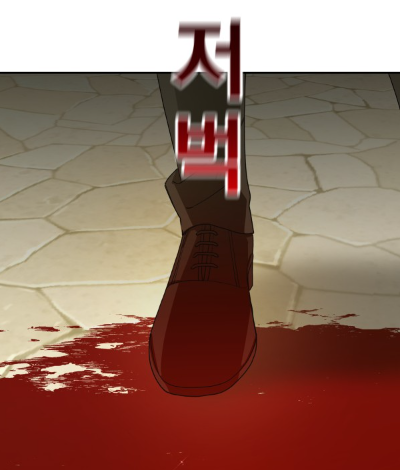

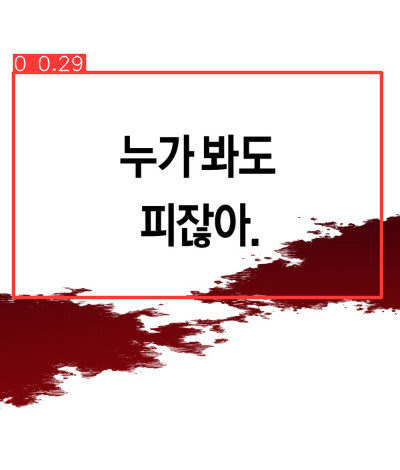

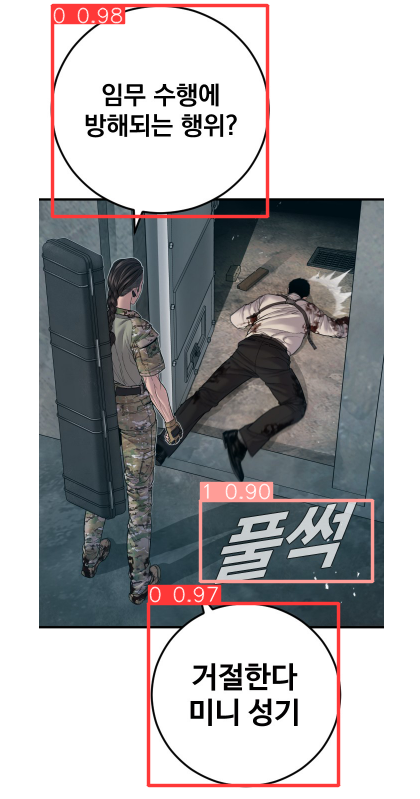

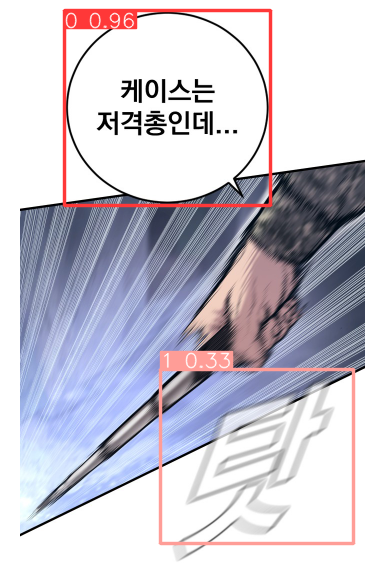

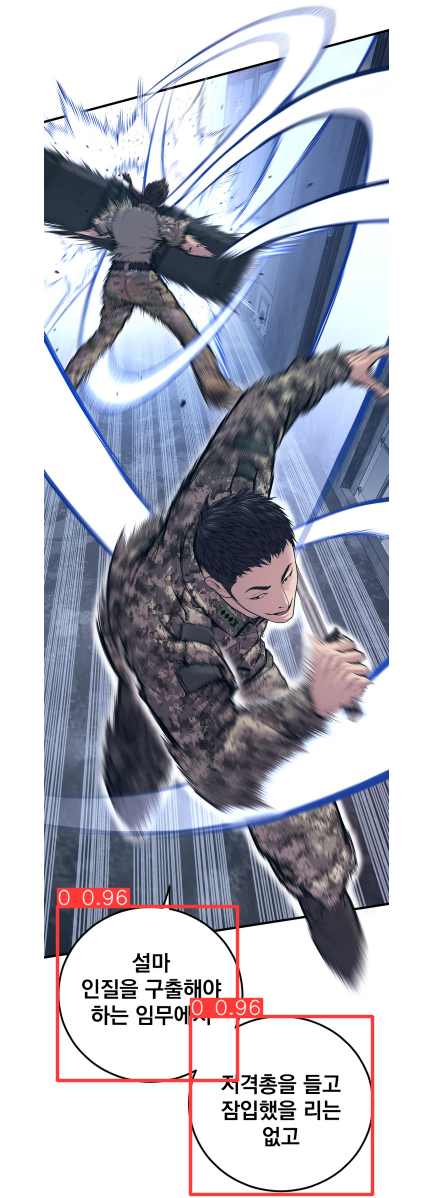

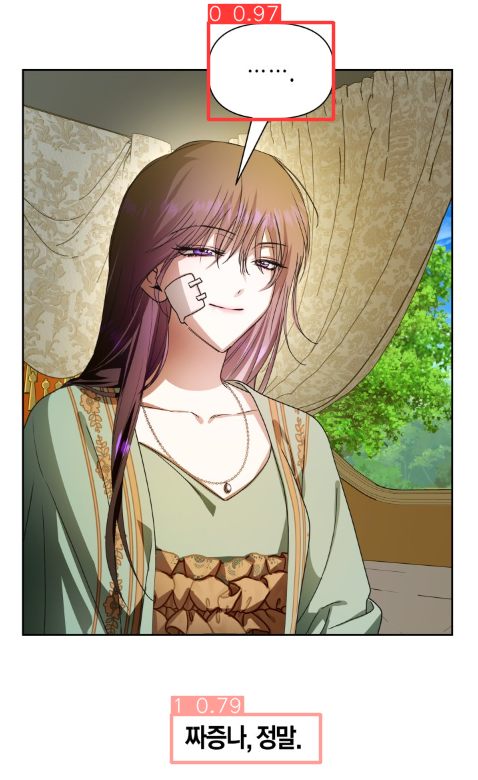

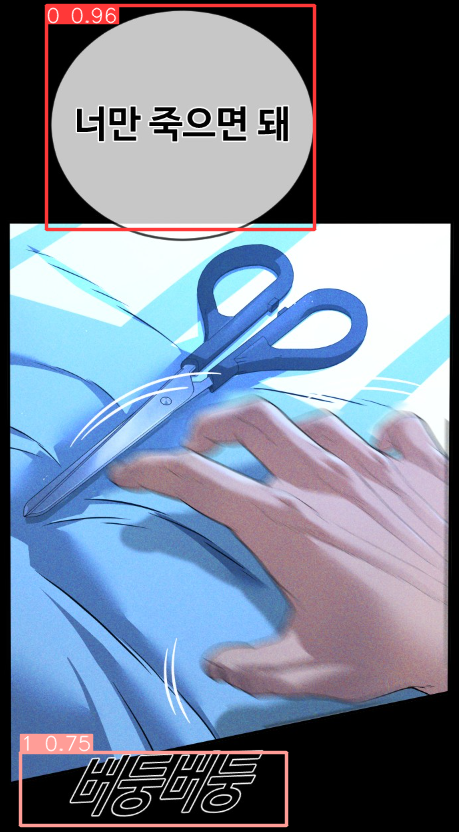

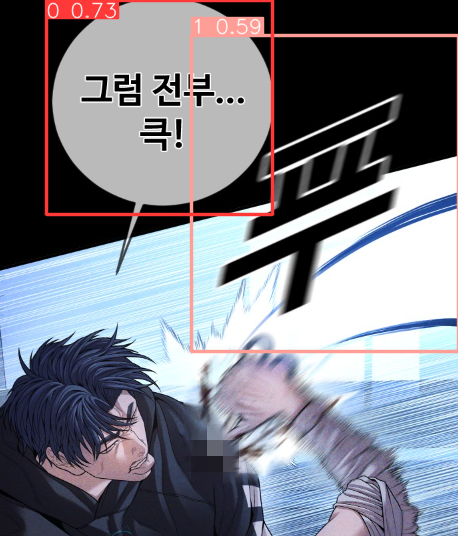

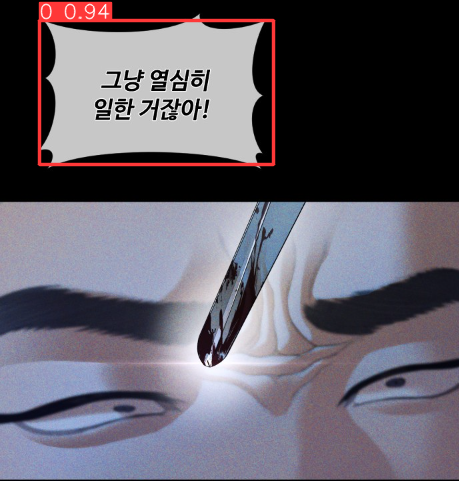

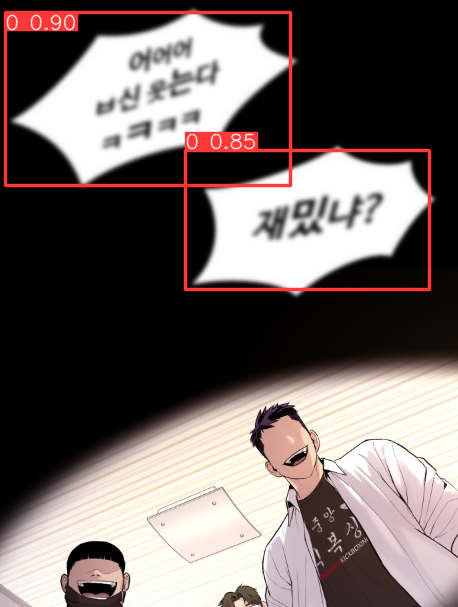

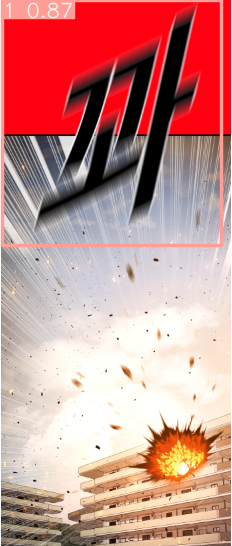

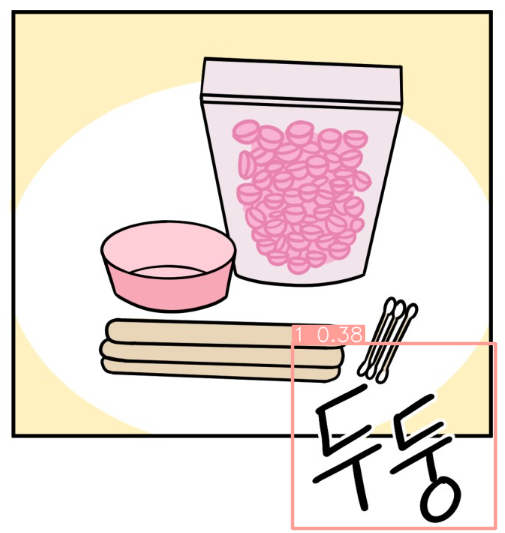

In [ ]:
import matplotlib.pyplot as plt

# 이미지 폴더 경로
folder_path = '/content/drive/MyDrive/Capstone/example/'

# 이미지 파일 이름 리스트 생성
image_files = [f'{i//10 + 1}-{i%10 + 1}.png' for i in range(20)]

# 이미지 파일 경로 리스트 생성
image_paths = [os.path.join(folder_path, img_file) for img_file in image_files]

# 이미지 읽고 YOLOv5 모델 적용 후 시각화
for img_path, img_file in zip(image_paths, image_files):
    # 이미지 로드
    img = os.path.join(folder_path, img_file)

    # 모델 적용
    results = model(img)

    # 결과 시각화
    results.show()

In [ ]:
# 데이터셋 경로 설정 (dataset.yaml 파일 사용)
data_path = '/content/drive/MyDrive/Capstone/dataset/dataset.yaml'

In [ ]:
# 성능 평가
!python yolov5/val.py --weights $model_path --data $data_path --img 640 --iou 0.5 --task val

val: data=/content/drive/MyDrive/Capstone/dataset/dataset.yaml, weights=['/content/drive/MyDrive/Capstone/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
100% 755k/755k [00:00<00:00, 44.8MB/s]
val: Scanning /content/drive/MyDrive/Capstone/dataset/val/labels.cache... 670 images, 0 backgrounds, 0 corrupt: 100% 670/670 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 21/21 [00:30<00:00,  1.44s/it]
                   all        670       2530       0.94      0.929      0.966    